In [40]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Load CSVs
csv_names = ['lewis', 'fifty', 'random', 'traditional', 'one']
dfs = []
for name in csv_names:
    df_temp = pd.read_csv(f'data/{name}.csv')
    df_temp['distribution_type'] = name
    dfs.append(df_temp)
df = pd.concat(dfs)

In [4]:
avg1st_score = df.groupby('distribution_type')['score_1'].mean()
avg2nd_score = df.groupby('distribution_type')['score_2'].mean()


# Score variability for different tile value distributions

## What are the scores for each player for each tile value distribution?

Text(0.5, 0.98, '')

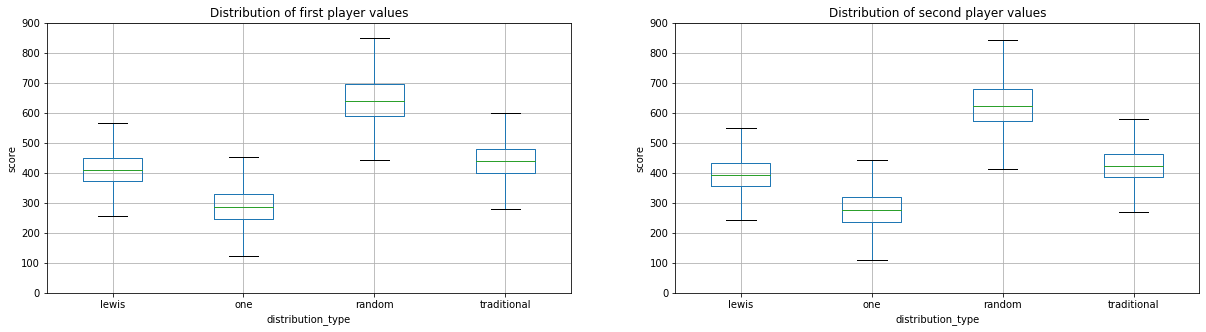

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20, 5))

# Dropping "fifty" distribution since it's not illustrative
df_no_fifty = df[df['distribution_type'] != 'fifty']

ax = df_no_fifty.boxplot('score_1', by='distribution_type', showfliers=False, ax=axes[0])
ax.set_ylim(0, 900)
fig = ax.get_figure()
ax.set_title('Distribution of first player values')
ax.set_ylabel('score')

ax = df_no_fifty.boxplot('score_2', by='distribution_type', showfliers=False, ax=axes[1])
ax.set_ylim(0, 900)
fig = ax.get_figure()
ax.set_title('Distribution of second player values')
ax.set_ylabel('score')

fig.suptitle('')

## What is the percent difference for each tile value distribution

Text(0, 0.5, 'percent difference')

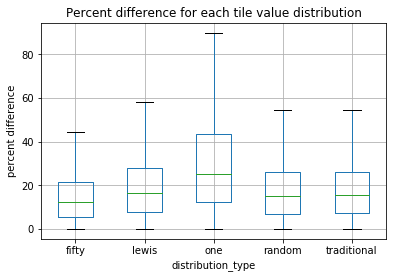

In [63]:
ax = df.boxplot('percent_dif', by='distribution_type', showfliers=False)
fig = ax.get_figure()
fig.suptitle('')
ax.set_title('Percent difference for each tile value distribution')
ax.set_ylabel('percent difference')

## What percent of the time was the winner the player who went first?

In [9]:
df['winner'] = df['score_1'] > df['score_2']
df.groupby('distribution_type')['winner'].apply(lambda series: series.sum() / series.shape[0] * 100)

distribution_type
fifty          55.518395
lewis          56.212026
one            54.456429
random         53.826030
traditional    56.978992
Name: winner, dtype: float64

# The Effect of Bingos

## What tile value distribution had the highest percentage of equal bingos?

In [10]:
df['equal_bingos'] = df['bingo_1'] == df['bingo_2']
df.groupby('distribution_type')['equal_bingos'].apply(lambda series: series.sum() / series.shape[0] * 100)

distribution_type
fifty          50.167224
lewis          22.952022
one            22.097644
random         24.133421
traditional    23.830391
Name: equal_bingos, dtype: float64

## For each tile value distribution, what is the average difference in bingo count?

In [11]:
df['bingo_difference'] = abs(df['bingo_1'] - df['bingo_2'])
df.groupby('distribution_type')['bingo_difference'].mean()

distribution_type
fifty          0.625418
lewis          1.325686
one            1.428470
random         1.266187
traditional    1.305323
Name: bingo_difference, dtype: float64

## What is the percent difference in scores when bingos are unequal v. when they are equal?

Text(0.5, 0.98, '')

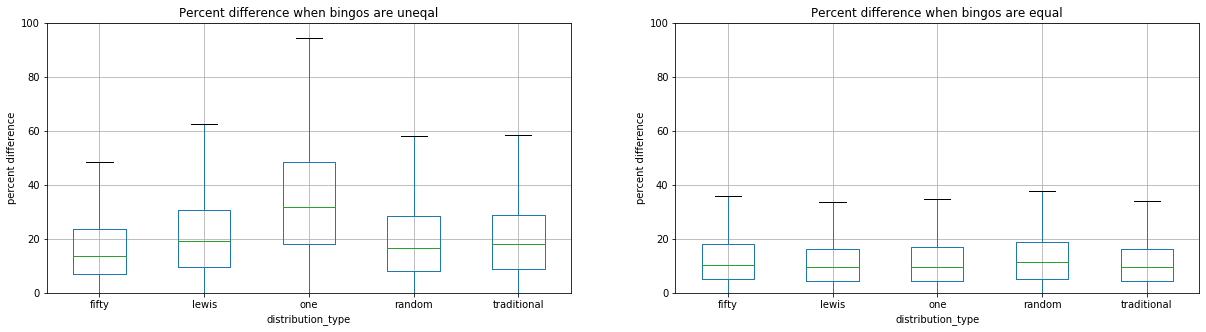

In [48]:
df_equal_bingos = df[df['equal_bingos']]
df_unequal_bingos = df[~df['equal_bingos']]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20, 5))

ax = df_unequal_bingos.boxplot('percent_dif', by='distribution_type', showfliers=False, ax=axes[0])
ax.set_ylim(0, 100)
fig = ax.get_figure()
ax.set_title('Percent difference when bingos are uneqal')
ax.set_ylabel('percent difference')

ax = df_equal_bingos.boxplot('percent_dif', by='distribution_type', showfliers=False, ax=axes[1])
ax.set_ylim(0, 100)
fig = ax.get_figure()
ax.set_title('Percent difference when bingos are equal')
ax.set_ylabel('percent difference')

fig.suptitle('')